# Exploratory Analysis : Student Performance

<strong>OBEJCTIVE:</strong> To understand the how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course)
gender                                 : Gender of the student <br>

race/ethnicity                         : Race of the Student As Group A/B/C<br>

parental level of education            : What is the education Qualification of Students Parent <br>

lunch                                  : Whether the lunch is Standard type/Free lunch or Some discounted lunch <br>

test preparation course                : Whether Student has Taken or not and Completed <br>

math score                             : Scores in Maths <br>

reading score                          : Scores in Reading <br>

writing score                          : Scores in Writing <br>


 MINOR PROJECT
 BY : <strong>Amisha Gupta</strong>
 Machine Learning Batch 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/AMISHA/Desktop/Minor Project/StudentsPerformance.csv")

# Understanding the data

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


This shows that 1000 students appeared for all the three exams and had an average of 66, 69, 68 in maths, reading, writing respectively. The minimun marks in maths are 0, in reading it's 17 and in writing it is 10. Maximum in all the three subjects is 100.

In [7]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [15]:
data.shape

(1000, 8)

In [16]:
data['total'] = data['math score'] + data['reading score']+data['writing score']

In [17]:
data['average'] = data['total']/3

# Cleaning the data

Cleaning of dataset has to be performed in order to check any outliers or null values so that they don't hinder our data analysis.

In [18]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total                          0
average                        0
dtype: int64

Since there are no null values, we need not do anything about it.

In [20]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total                            int64
average                        float64
dtype: object

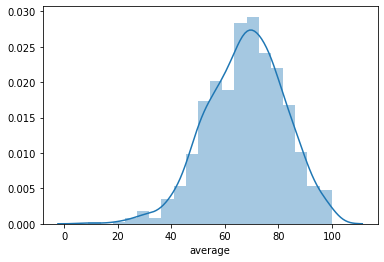

In [21]:
sns.distplot(data['average'],bins=20)

Since the data is also continuous, there aren't any outliers.

Here, the cleaning of data is done. The dataset neither has any null values nor any outliers.

# Relationship Analysis

Now, to understand the relation between various aspects and marks, I'll take the help of graphs as follows.

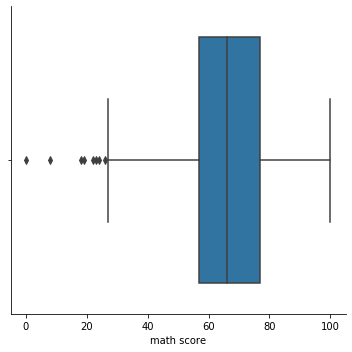

In [24]:
sns.catplot(x='math score', kind='box', data=data)

This shows that the maximum students have secured between 60-80 in maths.

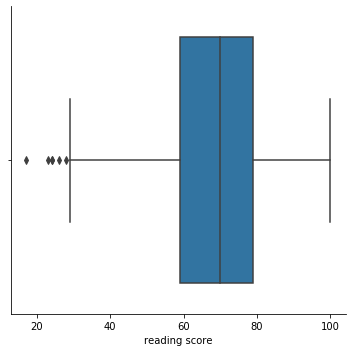

In [25]:
sns.catplot(x='reading score', kind='box', data=data)

This shows that the maximum students have secured between 60-80 in reading.

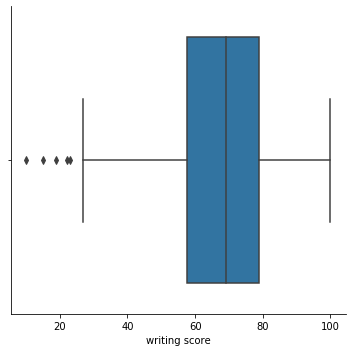

In [28]:
sns.catplot(x='writing score', kind='box', data=data)

This shows that the maximum students have secured between 60-80 in writing.

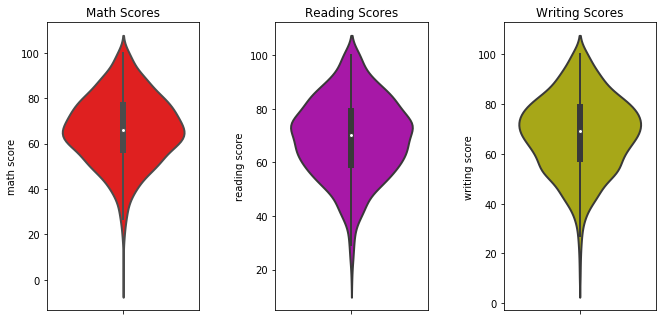

In [90]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math score',data=data,color='r',linewidth=2)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading score',data=data,color='m',linewidth=2)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(y='writing score',data=data,color='y',linewidth=2)
plt.show()

In [34]:
corelation = data.corr()

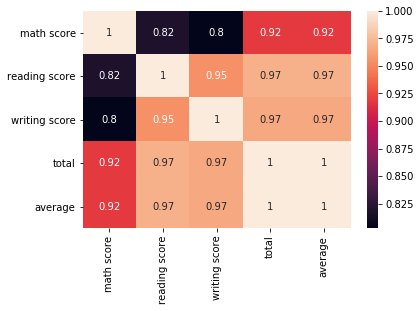

In [35]:
sns.heatmap(corelation , xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)

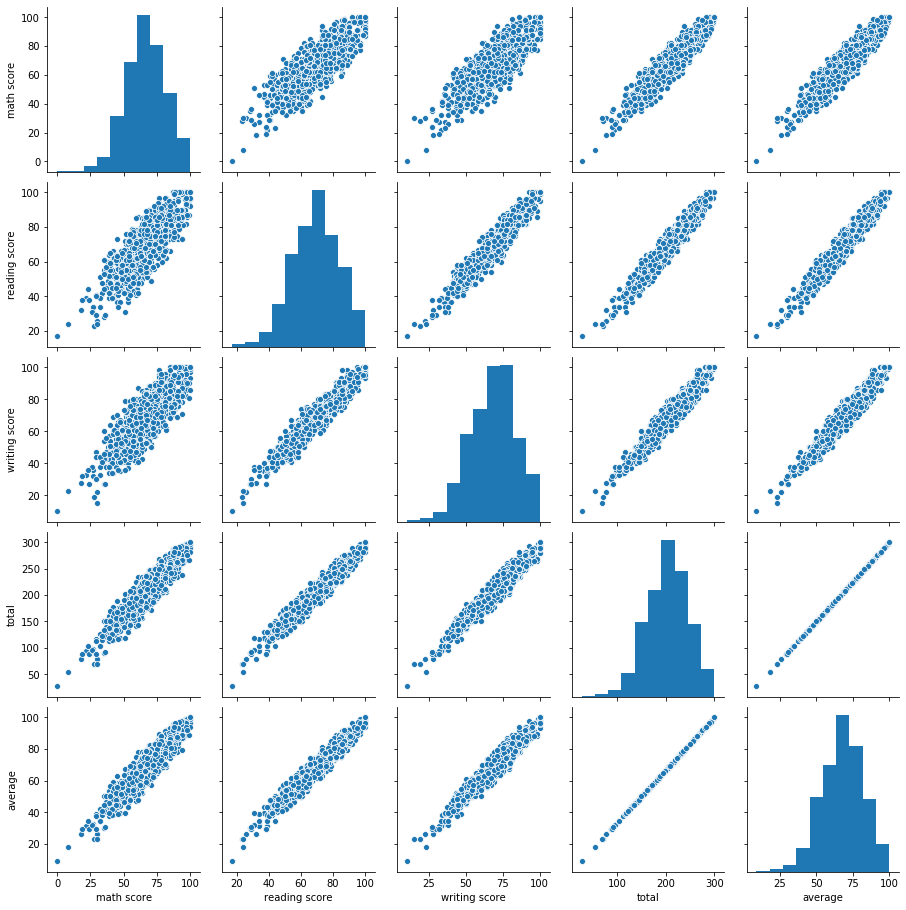

In [99]:
sns.pairplot(data)

### If a student is securing high marks in a subject, there are high chances of student scoring greater marks in some other subject as well.

### Now we'll see the relation of marks with other aspects as well

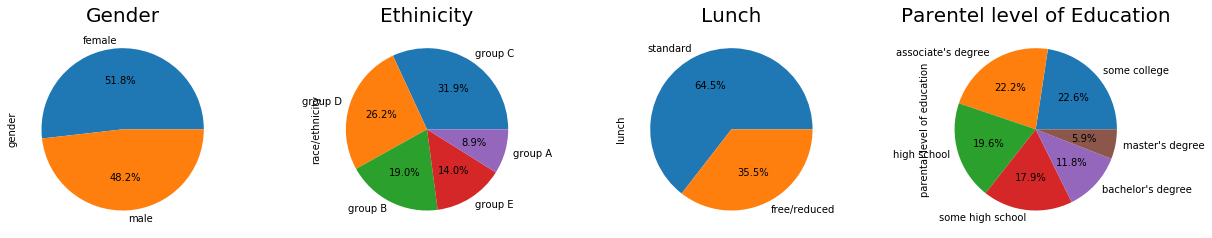

In [91]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
data['gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('Ethinicity',fontsize = 20)
data['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(143)
plt.title('Lunch',fontsize = 20)
data['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(144)
plt.title('Parentel level of Education',fontsize = 20)
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

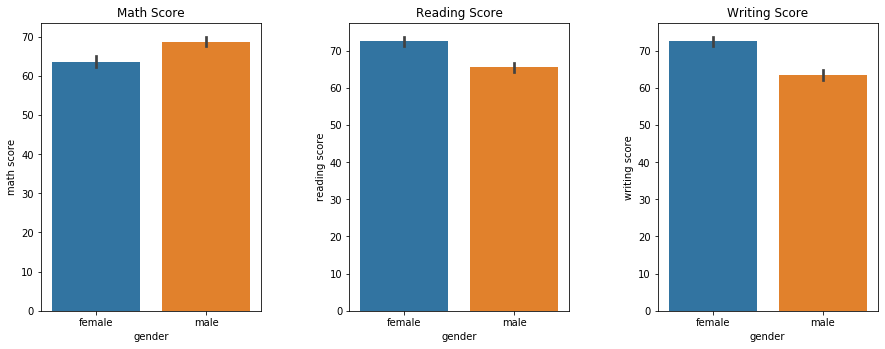

In [32]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.5)
plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="gender", y="math score", data=data)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="gender", y="reading score", data=data)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="gender", y="writing score", data=data)
plt.show()

### This clearly shows that females score more in reading and writing whereas males score more in maths.

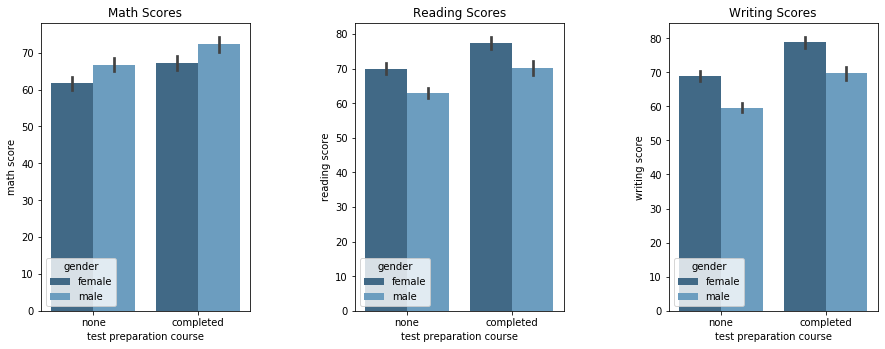

In [44]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=data, palette="Blues_d")
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=data, palette="Blues_d")
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=data, palette="Blues_d")
plt.show()


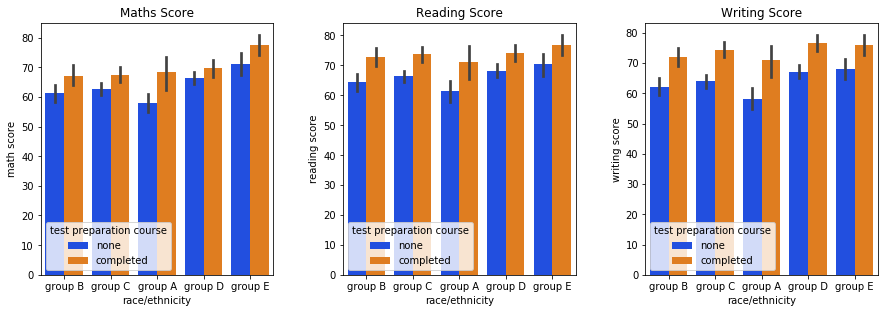

In [106]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.2, right=0.9, top=0.9,wspace=0.30, hspace=0.2)
plt.subplot(131)
plt.title('Maths Score')
sns.barplot(x="race/ethnicity", y="math score", hue="test preparation course", data=data, palette="bright")
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(hue="test preparation course", y="reading score", x="race/ethnicity", data=data, palette="bright")
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(hue="test preparation course", y="writing score", x= 'race/ethnicity',data=data, palette="bright")

plt.show()

This shows that students of <strong>Group E</strong> who completed their test preparation course scored the highest.

### This shows that students whether male/female who completed their test preparation course score more. 

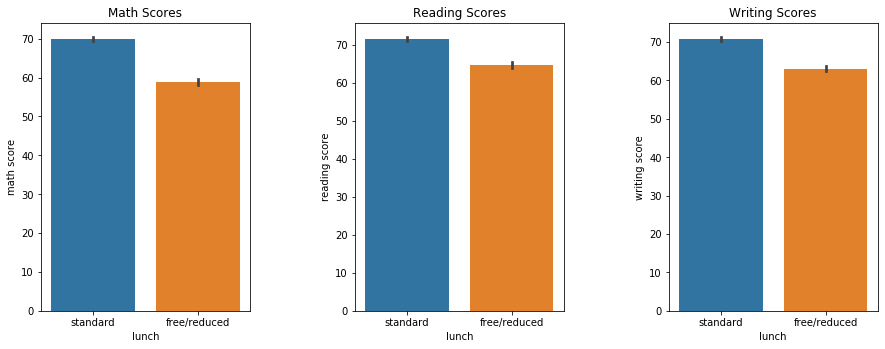

In [48]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(y="math score", x="lunch", data=data,  ci=68)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(y="reading score", x="lunch", data=data,  ci=68)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot( y="writing score", x="lunch", data=data,  ci=68)
plt.show()

### The students having standard lunch are clearly scoring more as compared to students who take free/reduced lunch.

This can also be visualized with the help of relational plot.

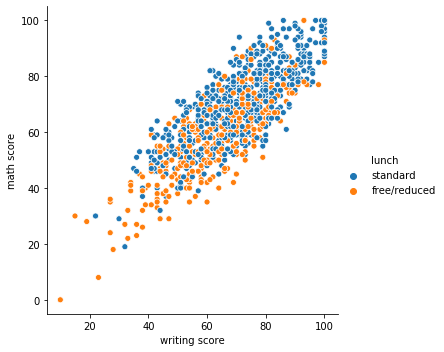

In [92]:
sns.relplot(x= 'writing score', y = 'math score', hue='lunch', data=data)

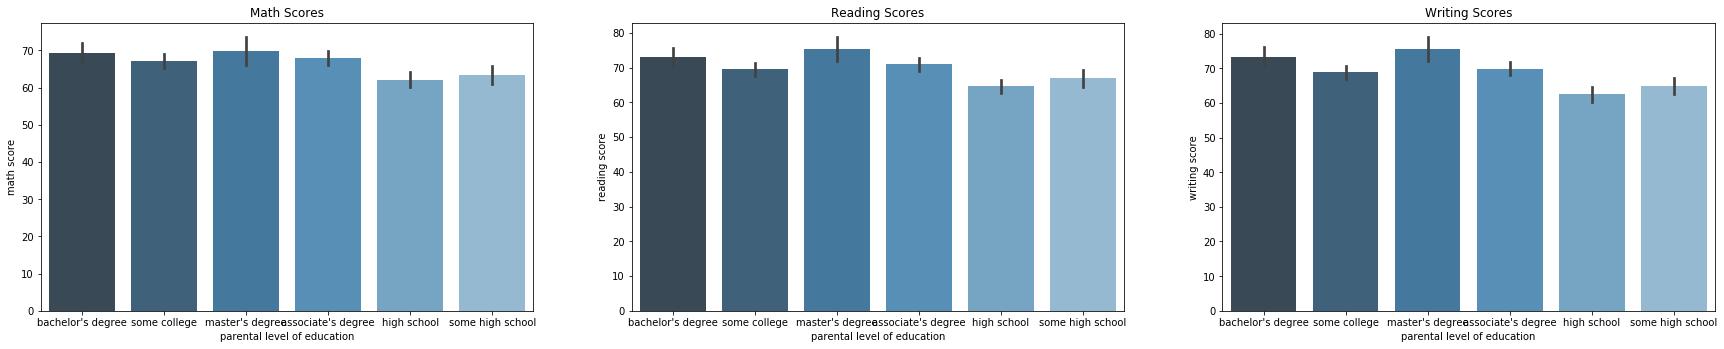

In [76]:
plt.figure(figsize=(30,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.2, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot( y="math score", x="parental level of education", data=data, palette="Blues_d")
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot( y="reading score", x="parental level of education", data=data, palette="Blues_d")
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot( y="writing score", x="parental level of education", data=data, palette="Blues_d")
plt.show()


This shows that the students who's parents have a <strong>master's degree</strong> score more in all the three subjects.

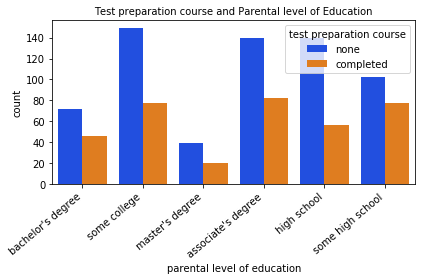

In [96]:
plt.title('Test preparation course and Parental level of Education',fontsize=10)
ax=sns.countplot(x="parental level of education", hue="test preparation course", data=data, palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Parents with better degrees sent very few of their children for any preparation course maybe they felt self study is better.

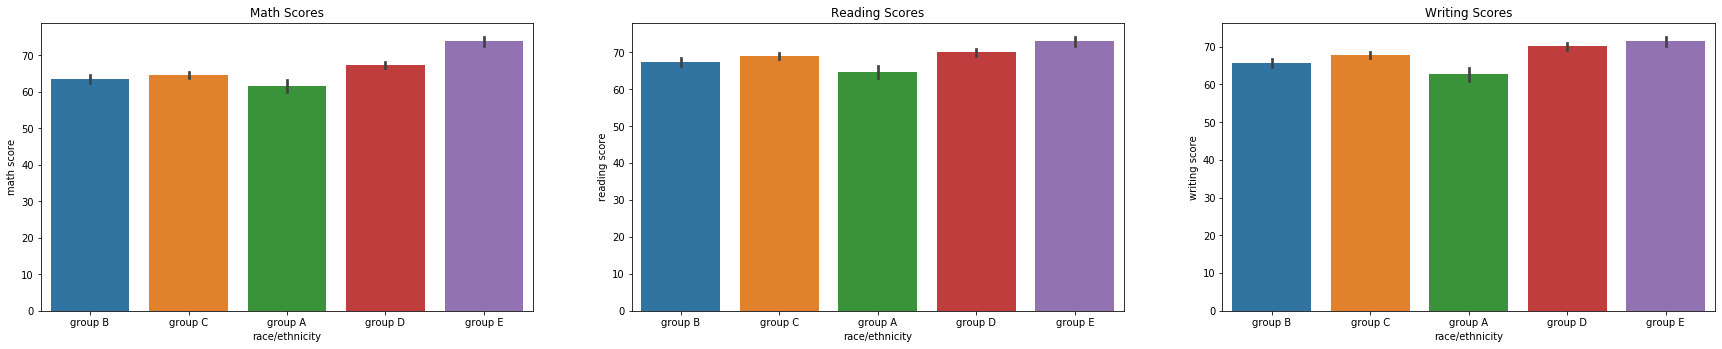

In [78]:
plt.figure(figsize=(30,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.2, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot( y="math score", x="race/ethnicity", data=data, ci=68)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot( y="reading score", x="race/ethnicity", data=data, ci=68)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot( y="writing score", x="race/ethnicity", data=data, ci=68)
plt.show()

This shows that <strong>GROUP E</strong> tends to perform better in all the subjects!

## Checking the status of result as pass / fail

In [115]:
data['math_passStat'] = np.where(data['math score']<40, 'Fail' ,'Pass')

In [116]:
data['write_passStat'] = np.where(data['writing score']<40, 'Fail' ,'Pass')

In [117]:
data['read_passStat'] = np.where(data['reading score']<40, 'Fail' ,'Pass')

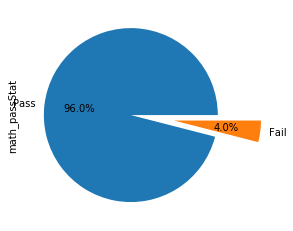

In [118]:
explode=(0,0.5)
data['math_passStat'].value_counts().plot.pie(explode=explode,autopct="%1.1f%%")
plt.show()

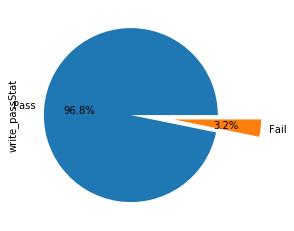

In [119]:
explode=(0,0.5)
data['write_passStat'].value_counts().plot.pie(explode=explode,autopct="%1.1f%%")
plt.show()

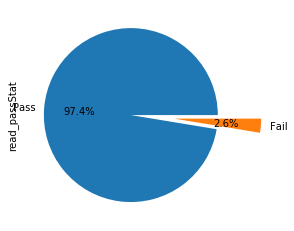

In [120]:
explode=(0,0.5)
data['read_passStat'].value_counts().plot.pie(explode=explode,autopct="%1.1f%%")
plt.show()

This shows that the subject in which maximum students who tend to score less/fail is <strong>Mathematics</strong>.

## INFERENCES:

<ul>
    <li>We see that maximum student fail or score less in <strong>Mathematics</strong>.</li>
    <li>Ehnicity/Religion : <strong>Group E</strong> tends to score higher.</li>
    <li>Students having <strong>standard lunch</strong> score more.</li>
    <li>Students who's parents have a <strong>master's degree</strong> tend to have a higher score.</li>
    <li>Females score higher in writing/reading whereas males score more in Mathematics.</li>
    <li>Students who have completed <strong>test preparation course</strong> score high.</li>
</ul>